<a href="https://colab.research.google.com/github/BitnooriLee/Applied-Machine-Learning/blob/main/assignment_3_DAT340.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Data set
from google.colab import drive
import csv
drive.mount('/content/gdrive')

root = '/content/gdrive/My Drive/DAT340/'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.model_selection import train_test_split

# the actual classification algorithm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
# for converting training and test datasets into matrices
# TfidfVectorizer does this specifically for documents
from sklearn.feature_extraction.text import TfidfVectorizer

# for bundling the vectorizer and the classifier as a single "package"
from sklearn.pipeline import make_pipeline

# for splitting the dataset into training and test sets 
from sklearn.model_selection import train_test_split

# for evaluating the quality of the classifier
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer

test_root = root +"PA3_test.tsv"
train_root = root +"PA3_train.tsv"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:


def read_documents_product_train_old(doc_root):
  X = []
  Y1 = []
  Y2 = []
  count = 0 
  total_count = 0
  with open(doc_root) as file:
      tsv_file = csv.reader(file, delimiter="\t")
      for line in tsv_file:
        if(line[0].split("/")[0] == line[0].split("/")[1]):
            count += 1
        total_count += 1
        #if(line[0].split("/")[0] == -1 or line[0].split("/")[1] == -1 ):
        Y1.append(line[0].split("/")[0])
        Y2.append(line[0].split("/")[1])
        X.append(line[1])
  print ("total review: ",total_count, 'agreed review: ',count, "consensus is: ", count/total_count, "%")  
  return X,Y1,Y2   

 

def read_documents_product(doc_root):
  X = []
  Y = []
  with open(doc_root) as file:
      tsv_file = csv.reader(file, delimiter="\t")
      for line in tsv_file:
          Y.append(line[0])
          X.append(line[1])
  return X,Y         


def read_documents_product_train(doc_root):
  X_acc = []
  Y1_acc = []
  Y2_acc = []
  no_of_elements = 0
  no_of_equals = 0
  with open(doc_root) as file:
      tsv_file = csv.reader(file, delimiter="\t")
      for line in tsv_file:
         no_of_elements = no_of_elements +1
         if(line[0].split("/")[0] == line[0].split("/")[1]):
           no_of_equals = no_of_equals + 1
           Y1_acc.append(line[0].split("/")[0])
           Y2_acc.append(line[0].split("/")[1])
           X_acc.append(line[1])
  return X_acc,Y1_acc,Y2_acc,no_of_elements,no_of_equals   

X_train_val_old, Y_train1_val_old, Y_train2_val_old = read_documents_product_train_old(train_root)
X_train_old, X_val_old,  Y_train1_old,  Y_val_old = train_test_split(X_train_val_old, Y_train1_val_old, test_size=0.2, random_state=12345)
#X_train, X_val,  Y_train1,  Y_val = train_test_split(X_train_val, Y_train1_val, test_size=0.2, random_state=12345)
X_test, Y_test = read_documents_product(test_root)

X_train_val, Y_train1_val, Y_train2_val,no_of_elements,no_of_equals   = read_documents_product_train(train_root)
X_train, X_val,  Y_train1,  Y_val = train_test_split(X_train_val, Y_train1_val, test_size=0.2, random_state=12345)
X_test, Y_test = read_documents_product(test_root)

total review:  7018 agreed review:  6622 consensus is:  0.9435736677115988 %


In [ ]:
no_of_equals/no_of_elements

0.9435736677115988

In [ ]:
print(X_train_val)
print(Y_train1_val)
print(Y_train2_val)

['Ordered my food the hole meal looked dead. plain cold and looked horrible the woman shouted at me as I complained about it and threatened to throw a chair at me', 'We stopped her whilst walking in the Haga area. The Cafe is well recommended. Good service and we enjoyed our teas and a Cinamon Roll. The latter was large but so good that between us we finished it! Recommended stop off.', 'Bad experience, On 23/03/19 Myself and my partner arrived at 20.00 and were promptly sent to the bar and told it would be roughly a 30 minute wait by the blonde lady at the front desk, she was impolite to start. After 50 minutes(and when we noticed the couple that arrived after us were seated before us) I went to talk again and she said they will be as quick as possible. Another 15 minutes passed during which another couple who arrived after us were seated. This happened a third time and then we left after paying for our drinks feeling like we were ignored. The bar tenders were fantastic however the fl

DUMMY CLASSIFIER

In [ ]:
from sklearn.dummy import DummyClassifier
pipeline = make_pipeline(TfidfVectorizer(), DummyClassifier(strategy="most_frequent"))
pipeline.fit(X_train, Y_train1)
acc_train = accuracy_score(Y_train1, pipeline.predict(X_train))
acc_val = accuracy_score(Y_val, pipeline.predict(X_val))
print("accuracy train",acc_train, "accuracy val",acc_val)

accuracy train 0.528601094959411 accuracy val 0.5252830188679245


CHANGE HYPERPARAMETER FOR TFIDVECTORIZER

0.9811213894657353
0.9592452830188679
This is df value 0.1
Max df accuracy
0.9765905229375118
0.950188679245283
This is df value 0.2
Max df accuracy
0.9777232395695676
0.9539622641509434
This is df value 0.4
Max df accuracy
0.9813101755710779
0.9615094339622642
This is df value 0.6
Max df accuracy
0.9813101755710779
0.9615094339622642
This is df value 0.8
Max df accuracy
0.9811213894657353
0.9592452830188679
This is df value 1.0
Max df accuracy
0.9811213894657353
0.9592452830188679
smooth_idfbool=False accuracy
0.9813101755710779
0.9592452830188679


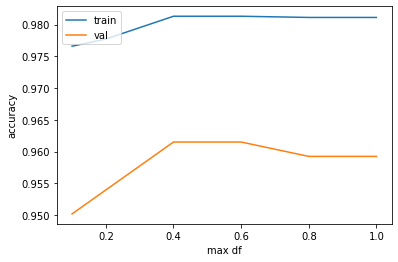

In [ ]:
# Deafult 
pipeline = make_pipeline( TfidfVectorizer(smooth_idf=True), MultinomialNB() )
pipeline.fit(X_train, Y_train1)
acc_train = accuracy_score(Y_train1, pipeline.predict(X_train))
print(acc_train)
acc_val = accuracy_score(Y_val, pipeline.predict(X_val))
print(acc_val)

acc_train_dtc = []
acc_val_dtc = []


# Change max df 
df = [0.1,0.2,0.4,0.6,0.8,1.0]
for i in range(0,len(df)):
  print("This is df value",df[i])
  print("Max df accuracy")
  pipeline = make_pipeline( TfidfVectorizer(max_df = df[i]), MultinomialNB() )
  pipeline.fit(X_train, Y_train1)
  acc_train = accuracy_score(Y_train1, pipeline.predict(X_train))
  acc_train_dtc.append(acc_train)
  print(acc_train)
  acc_val = accuracy_score(Y_val, pipeline.predict(X_val))
  acc_val_dtc.append(acc_val)

  print(acc_val)

plt.plot(df,acc_train_dtc,label="train")
plt.plot(df,acc_val_dtc,label="val")
plt.xlabel("max df")
plt.ylabel("accuracy")
plt.legend(loc="upper left")

# Change smooth_idfbool, default=True
print("smooth_idfbool=False accuracy")
pipeline = make_pipeline( TfidfVectorizer(smooth_idf=False), MultinomialNB() )
pipeline.fit(X_train, Y_train1)
acc_train = accuracy_score(Y_train1, pipeline.predict(X_train))
print(acc_train)
acc_val = accuracy_score(Y_val, pipeline.predict(X_val))
print(acc_val)


Best max_df for TFID vectorizer is 0.4

CHANGE HYPERPARAMETER FOR MULTINOMIAL NAIVE BAYES

0.9811213894657353
0.9592452830188679


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


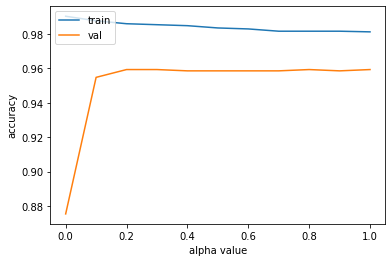

In [ ]:
pipeline = make_pipeline( TfidfVectorizer(), MultinomialNB() )
pipeline.fit(X_train, Y_train1)
acc_train = accuracy_score(Y_train1, pipeline.predict(X_train))
print(acc_train)
acc_val = accuracy_score(Y_val, pipeline.predict(X_val))
print(acc_val)



#changing alpha 

acc_train_dtc = []
acc_val_dtc = []
i_value = [] 

i = 0
while(i < 1):
  pipeline = make_pipeline(
    TfidfVectorizer(), MultinomialNB(alpha= i)
  )
  pipeline.fit(X_train, Y_train1)
  acc_temp_train = accuracy_score(Y_train1, pipeline.predict(X_train))
  acc_train_dtc.append(acc_temp_train)
  
  acc_temp_val = accuracy_score(Y_val, pipeline.predict(X_val))
  acc_val_dtc.append(acc_temp_val)
  i_value.append(i)

  i+= 0.1

plt.plot(i_value,acc_train_dtc,label="train")
plt.plot(i_value,acc_val_dtc,label="val")
plt.xlabel("alpha value")
plt.ylabel("accuracy")
plt.legend(loc="upper left")

Best alpha value for multinomial NB is 0.2

CHANGE HYPERPARAMETERS FOR LINEAR SVC 

0.9996224277893148
0.9630188679245283


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[[-0.31903914 -0.0960293   0.55582773 ...  0.11175126  0.
   0.        ]]
[ 6119  7595 10023 ...   506  3272  2543]
importantWords_negative:  ['not', 'rude', 'worst', 'poor', 'bland', 'disappointing', 'mediocre', 'bad']
importantWords_positive:  ['delicious', 'excellent', 'amazing', 'great', 'loved', 'best', 'fantastic', 'good']


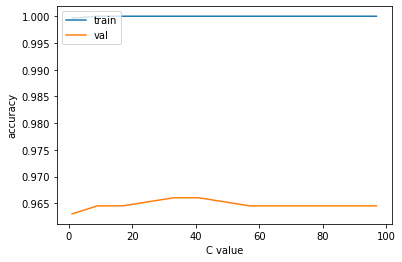

In [ ]:
pipeline = make_pipeline( TfidfVectorizer(), LinearSVC() )
pipeline.fit(X_train, Y_train1)
acc_train = accuracy_score(Y_train1, pipeline.predict(X_train))
print(acc_train)
acc_val = accuracy_score(Y_val, pipeline.predict(X_val))
print(acc_val)


#changing C 

acc_train_dtc = []
acc_val_dtc = []
i_value = [] 
C_values = []


vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
array = vectorizer.get_feature_names_out()

for i in range(1,100,8):
  pipeline = make_pipeline(
    TfidfVectorizer(), LinearSVC(C = i)
  )
  pipeline.fit(X_train, Y_train1)
  acc_temp_train = accuracy_score(Y_train1, pipeline.predict(X_train))
  acc_train_dtc.append(acc_temp_train)
  
  acc_temp_val = accuracy_score(Y_val, pipeline.predict(X_val))
  acc_val_dtc.append(acc_temp_val)
  C_values.append(i)


print(pipeline.named_steps['linearsvc'].coef_)
coef = pipeline.named_steps['linearsvc'].coef_[0]
ind = np.argsort(coef, axis=0) 
print(ind)
importantWords_negative = [array[ind[0]],array[ind[1]],array[ind[2]],array[ind[3]],array[ind[4]],array[ind[5]],array[ind[6]],array[ind[7]]]
importantWords_positive = [array[ind[len(ind)-1]],array[ind[len(ind)-2]],array[ind[len(ind)-3]],array[ind[len(ind)-4]],array[ind[len(ind)-5]],array[ind[len(ind)-6]],array[ind[len(ind)-7]],array[ind[len(ind)-8]]]
print('importantWords_negative: ',importantWords_negative)
print('importantWords_positive: ',importantWords_positive)


plt.plot(C_values,acc_train_dtc,label="train")
plt.plot(C_values,acc_val_dtc,label="val")
plt.xlabel("C value")
plt.ylabel("accuracy")
plt.legend(loc="upper left")



Best regularization value (C) for Linear SVC is 1.

CHANGE HYPERPARAMETERS FOR MLPClassifier

In [ ]:
#pipeline = make_pipeline( TfidfVectorizer(), MLPClassifier(bat) )
#pipeline.fit(X_train, Y_train1)
#acc_train = accuracy_score(Y_train1, pipeline.predict(X_train))
#print(acc_train)
#acc_test = accuracy_score(Y_test, pipeline.predict(X_test))
#print(acc_test)

#changing C 

acc_train_dtc = []
acc_val_dtc = []
i_value = [] 
C_values = []
batch_sizes = [16,64,128,256]
for i in range(0,len(batch_sizes)):
  pipeline = make_pipeline(
    TfidfVectorizer(), MLPClassifier(batch_size = batch_sizes[i])
  )
  pipeline.fit(X_train, Y_train1)
  acc_temp_train = accuracy_score(Y_train1, pipeline.predict(X_train))
  print(acc_temp_train)
  acc_train_dtc.append(acc_temp_train)
  
  acc_temp_val = accuracy_score(Y_val, pipeline.predict(X_val))
  acc_val_dtc.append(acc_temp_val)
  print(acc_temp_val)



1.0
0.9569811320754718
1.0
0.9637735849056603
1.0
0.9615094339622642
1.0
0.9554716981132075


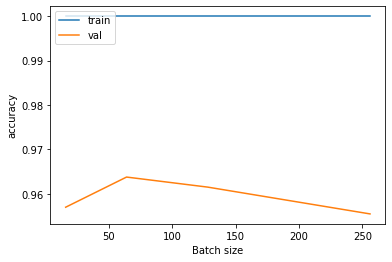

In [ ]:

plt.plot(batch_sizes,acc_train_dtc,label="train")
plt.plot(batch_sizes,acc_val_dtc,label="val")
plt.xlabel("Batch size")
plt.ylabel("accuracy")
plt.legend(loc="upper left")

Best batch size is 64 for MLP classifier. 

0.9960354917878044
0.9388679245283019
1.0
0.950188679245283
1.0
0.9607547169811321
1.0
0.9584905660377359


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1.0
0.9592452830188679


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.976968095148197
0.9449056603773585
0.471398905040589
0.47471698113207544


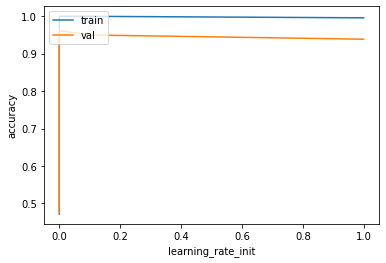

In [ ]:
#changing learning_rate_init 

acc_train_dtc = []
acc_val_dtc = []
i_value = [] 

i = 1
while(i > 0.000001):
  pipeline = make_pipeline(
    TfidfVectorizer(), MLPClassifier(learning_rate_init= i)
  )
  pipeline.fit(X_train, Y_train1)
  acc_temp_train = accuracy_score(Y_train1, pipeline.predict(X_train))
  acc_train_dtc.append(acc_temp_train)
  print(acc_temp_train)
  acc_temp_val = accuracy_score(Y_val, pipeline.predict(X_val))
  acc_val_dtc.append(acc_temp_val)
  print(acc_temp_val)
  i_value.append(i)

  i/= 10

plt.plot(i_value,acc_train_dtc,label="train")
plt.plot(i_value,acc_val_dtc,label="val")
plt.xlabel("learning_rate_init")
plt.ylabel("accuracy")
plt.legend(loc="upper left")

Best learning rate value for MLP classifier is 0.01.

CHOOSE WHICH TRAIN SET TO USE

In [ ]:
pipeline = make_pipeline( TfidfVectorizer(max_df = 0.4), MultinomialNB(alpha=0.2) )
pipeline.fit(X_train_old, Y_train1_old)
acc_temp_train = accuracy_score(Y_train1_old, pipeline.predict(X_train_old))
print(acc_temp_train)
acc_temp_val = accuracy_score(Y_val_old, pipeline.predict(X_val_old))
print(acc_temp_val)

pipeline = make_pipeline( TfidfVectorizer(max_df = 0.4), MultinomialNB(alpha=0.2) )
pipeline.fit(X_train, Y_train1)
acc_temp_train = accuracy_score(Y_train1, pipeline.predict(X_train))
print(acc_temp_train)
acc_temp_val = accuracy_score(Y_val, pipeline.predict(X_val))
print(acc_temp_val)

0.9481653010331315
0.915954415954416
0.9867849726260147
0.9592452830188679


EVALUATION FOR 3 MODEL WITH BEST HYPERPARAMETERS



In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


Evaluation with Multinomial NB

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       864
           1       0.96      0.94      0.95       886

    accuracy                           0.95      1750
   macro avg       0.95      0.95      0.95      1750
weighted avg       0.95      0.95      0.95      1750

[[828  36]
 [ 56 830]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


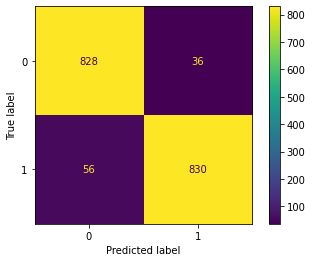

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
pipeline = make_pipeline( TfidfVectorizer(max_df = 0.4), MultinomialNB(alpha=0.2) )
pipeline.fit(X_train, Y_train1)
guesses = pipeline.predict(X_test)
print(classification_report(Y_test, guesses))
print(confusion_matrix(Y_test, guesses))
plot_confusion_matrix(pipeline, X_test, Y_test)  


In [ ]:
import numpy as np

false_negative = [] #it predicted 0 but should be 1 
false_positive = []
for i in range(0,len(X_test)):
  if (guesses[i]!=Y_test[i]):
    if (guesses[i] == "0"):
      false_negative.append(X_test[i])
    elif(guesses[i] == "1"):  
       false_positive.append(X_test[i])
print("false_negative")       
print(false_negative)
print("false_positive") 
print(false_positive)


false_negative
['Food is better than our expectation. Would like to go again some time later!', "We ate here last night after a film, the food was great and prices reasonable. Better still, I accidentally ordered a biryani with chicken in it (I'm a vegetarian) and they took it back and changed it for a veggie biryani without charging me for it, even though it was totally my fault. That's classy. They also wouldn't take any service charge...Would definitely come again!", 'Went to the local pub to ask for a recommendation (and a pint of course) and was told to come here.Wasn’t disappointed and really enjoyed the food.Recently I’ve not bothered with rice, and have found a Naan bread and curry enough, and that was the case here. Garlic naan was hot, fresh, doughy in the middle and crisp on the outside and smothered in garlic. Could have enjoyed it as a meal on its own.Had tandoori chicken masala that was just the right heat and plenty of sauce for dipping into. My wife did have rice and a 

Evaluation with Linear SVC

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       864
           1       0.96      0.97      0.96       886

    accuracy                           0.96      1750
   macro avg       0.96      0.96      0.96      1750
weighted avg       0.96      0.96      0.96      1750

[[825  39]
 [ 31 855]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


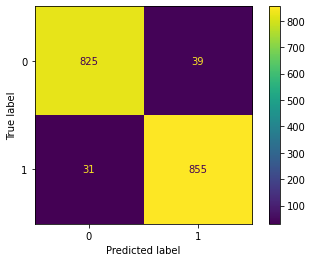

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
pipeline = make_pipeline( TfidfVectorizer(max_df = 0.4), LinearSVC(C=43))
pipeline.fit(X_train, Y_train1)
guesses = pipeline.predict(X_test)
print(classification_report(Y_test, guesses))
print(confusion_matrix(Y_test, guesses))
plot_confusion_matrix(pipeline, X_test, Y_test)  


In [ ]:
import numpy as np

false_negative = [] #it predicted 0 but should be 1 
false_positive = []
for i in range(0,len(X_test)):
  if (guesses[i]!=Y_test[i]):
    if (guesses[i] == "0"):
      false_negative.append(X_test[i])
    elif(guesses[i] == "1"):  
       false_positive.append(X_test[i])
print("false_negative")       
print(false_negative)
print("false_positive") 
print(false_positive)


false_negative
['Sticky Fingers is the greatest!\xa0', 'Just had dinner at monsoon with 2 friends. The food was great and so was the service. 10/10 real indian experience. Next time i’m in london i’ll go to monsoon again!', "While visiting London and staying in Brick Lane, we checked into our hotel in the early hours of the morning. We saw that The Monsoon was open so headed in for a meal. They had closed for the evening but cooked us a meal for us to take away . While waiting, we were able to have a drink. As we were in a hotel room, we had no cutlery or bowls to use, so staff sorted us some plastic cutlery and two plastic take away pots for us to use as bowls. They even threw in a bottle of Cobra. They couldn't have been more helpful, in the early hours of the morning, to make sure we could eat, especially as they were probably about to head home themselves...thankyou.", 'The Munchner Stubn is a very traditional German restaurant, so if you like meat and beer, you have come to the ri

Evaluation with MLP classifier

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       864
           1       0.94      0.97      0.95       886

    accuracy                           0.95      1750
   macro avg       0.95      0.95      0.95      1750
weighted avg       0.95      0.95      0.95      1750

[[810  54]
 [ 31 855]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


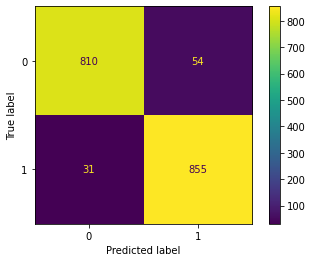

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
pipeline = make_pipeline( TfidfVectorizer(max_df = 0.4), MLPClassifier(batch_size = 64,learning_rate_init=0.01))
pipeline.fit(X_train, Y_train1)
guesses = pipeline.predict(X_test)
print(classification_report(Y_test, guesses))
print(confusion_matrix(Y_test, guesses))
plot_confusion_matrix(pipeline, X_test, Y_test)  



In [ ]:
import numpy as np

false_negative = [] #it predicted 0 but should be 1 
false_positive = []
for i in range(0,len(X_test)):
  if (guesses[i]!=Y_test[i]):
    if (guesses[i] == "0"):
      false_negative.append(X_test[i])
    elif(guesses[i] == "1"):  
       false_positive.append(X_test[i])
print("false_negative")       
print(false_negative)
print("false_positive") 
print(false_positive)


false_negative
["We ate here last night after a film, the food was great and prices reasonable. Better still, I accidentally ordered a biryani with chicken in it (I'm a vegetarian) and they took it back and changed it for a veggie biryani without charging me for it, even though it was totally my fault. That's classy. They also wouldn't take any service charge...Would definitely come again!", "While visiting London and staying in Brick Lane, we checked into our hotel in the early hours of the morning. We saw that The Monsoon was open so headed in for a meal. They had closed for the evening but cooked us a meal for us to take away . While waiting, we were able to have a drink. As we were in a hotel room, we had no cutlery or bowls to use, so staff sorted us some plastic cutlery and two plastic take away pots for us to use as bowls. They even threw in a bottle of Cobra. They couldn't have been more helpful, in the early hours of the morning, to make sure we could eat, especially as they w